In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

In [11]:
tickers = '^BVSP USDBRL=X'
carteira = yf.download(tickers, start = '2005-01-01')['Close']

[*********************100%***********************]  2 of 2 completed


In [12]:
carteira

,USDBRL=X,^BVSP
Date,,
2005-01-03,NaN,25722.000000
2005-01-04,NaN,24848.000000
2005-01-05,NaN,24692.000000
2005-01-06,NaN,24367.000000
2005-01-07,NaN,24747.000000
...,...,...
2021-06-16,5.0438,129259.000000
2021-06-17,5.0543,128057.000000
2021-06-18,5.0074,128405.000000


In [13]:
carteira.dropna(inplace = True)
carteira

,USDBRL=X,^BVSP
Date,,
2006-03-24,2.1547,37577.000000
2006-03-27,2.1503,37641.000000
2006-03-28,2.1677,36682.000000
2006-03-29,2.2206,37492.000000
2006-03-30,2.1922,37777.000000
...,...,...
2021-06-16,5.0438,129259.000000
2021-06-17,5.0543,128057.000000
2021-06-18,5.0074,128405.000000


In [14]:
carteira.columns = ['DOLAR','IBOV']
carteira

,DOLAR,IBOV
Date,,
2006-03-24,2.1547,37577.000000
2006-03-27,2.1503,37641.000000
2006-03-28,2.1677,36682.000000
2006-03-29,2.2206,37492.000000
2006-03-30,2.1922,37777.000000
...,...,...
2021-06-16,5.0438,129259.000000
2021-06-17,5.0543,128057.000000
2021-06-18,5.0074,128405.000000


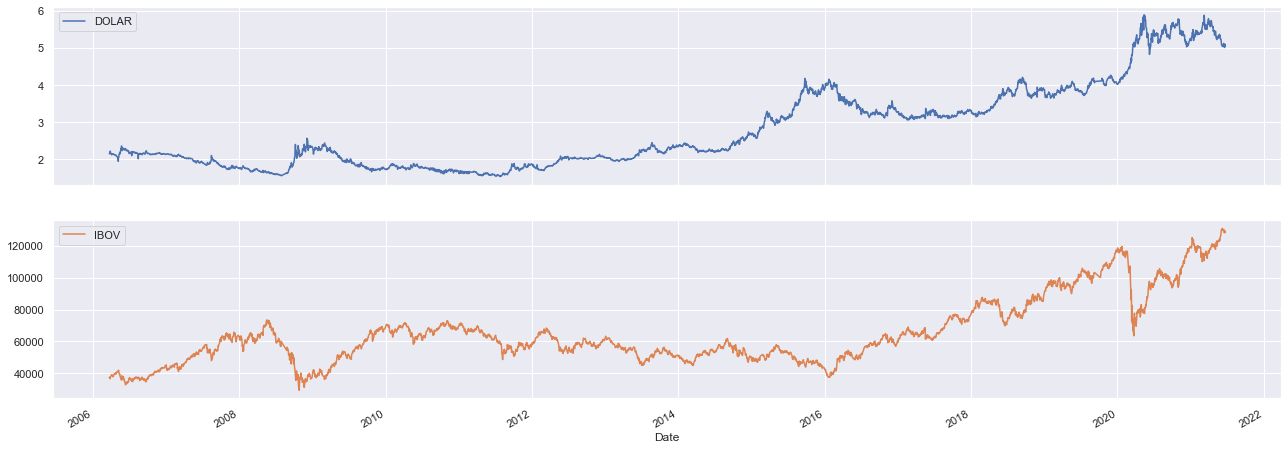

In [15]:
sns.set()
carteira.plot(subplots = True, figsize=(22,8));

<AxesSubplot:xlabel='Date'>

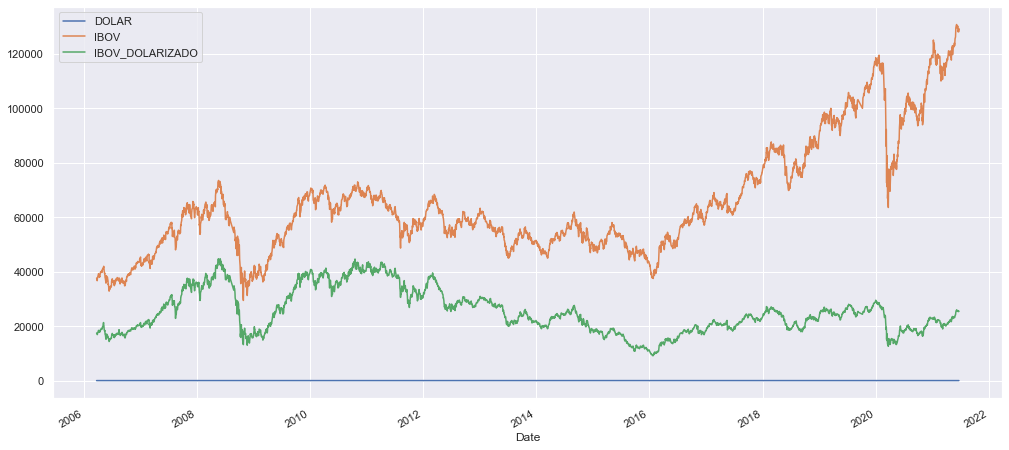

In [24]:
carteira['IBOV_DOLARIZADO'] = carteira['IBOV'] / carteira['DOLAR']
carteira.plot(figsize=(17,8))

In [19]:
retorno = carteira.pct_change()[1:]
retorno

,DOLAR,IBOV
Date,,
2006-03-27,-0.002042,0.001703
2006-03-28,0.008092,-0.025478
2006-03-29,0.024404,0.022082
2006-03-30,-0.012789,0.007602
2006-03-31,-0.011404,0.004632
...,...,...
2021-06-16,-0.002926,-0.006396
2021-06-17,0.002082,-0.009299
2021-06-18,-0.009279,0.002718


In [20]:
retorno.describe()

,DOLAR,IBOV
count,3710.000000,3710.000000
mean,0.000305,0.000493
std,0.012323,0.017962
min,-0.104792,-0.147797
25%,-0.005857,-0.008437
50%,0.000029,0.000710
75%,0.006260,0.009734
max,0.101524,0.146560


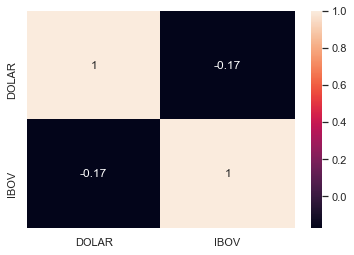

In [22]:
sns.heatmap(retorno.corr(), annot = True);

<AxesSubplot:xlabel='Date'>

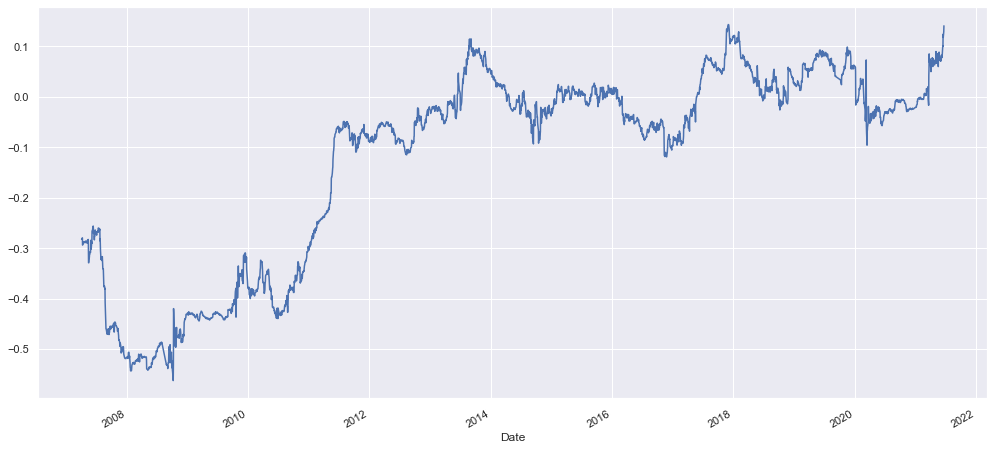

In [23]:
retorno['DOLAR'].rolling(252).corr(retorno['IBOV']).plot(figsize=(17,8))